In [92]:
import tensorflow as tf
import numpy as np
import cv2
import glob
from tqdm import tqdm
from tensorflow import keras
import shutil
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'cv'

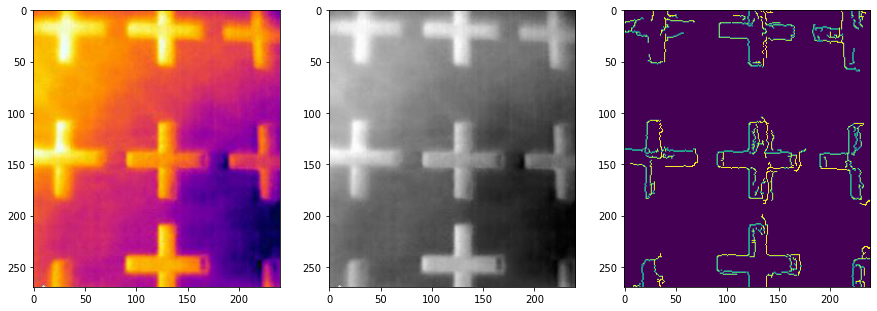

In [213]:
f, a = plt.subplots(1,3, figsize=(15,15))
img = cv2.imread("images/1.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
a[0].imshow(img_rgb)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
a[1].imshow(img_gray, cmap='gray')
edges = cv2.Canny(image=img_gray, threshold1=20, threshold2=100) # Canny Edge Detection
a[2].imshow(edges)


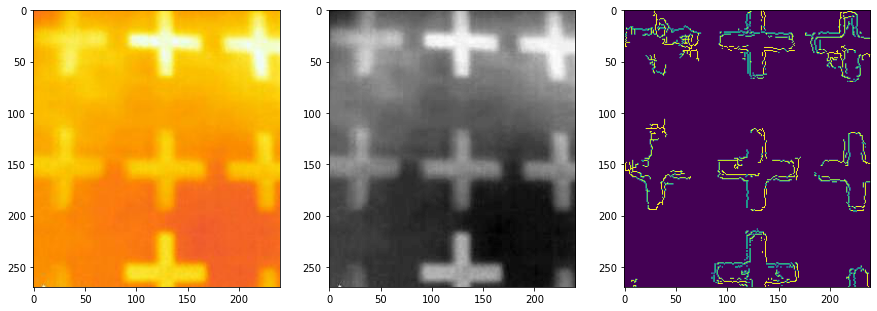

In [214]:
f, a = plt.subplots(1,3, figsize=(15,15))
img = cv2.imread("images/2.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
a[0].imshow(img_rgb)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
a[1].imshow(img_gray, cmap='gray')
edges = cv2.Canny(image=img_gray, threshold1=0, threshold2=50) # Canny Edge Detection
a[2].imshow(edges, )

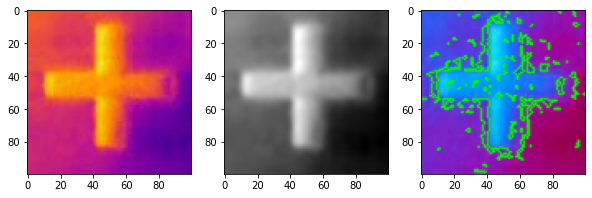

In [218]:
f, a = plt.subplots(1,3,figsize=(10,10))
image = cv2.imread("images/1.jpg")
image = image[100:200, 80:180]
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
a[0].imshow(rgb)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7,7), 0)
a[1].imshow(blur, cmap= 'gray')


# ret, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)

thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,3)

# ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

image_copy = image.copy()

cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=1, lineType=cv2.LINE_AA)
a[2].imshow(image_copy, cmap= 'gray')

# # ret, thresh = cv2.threshold(gray, 20, 100, 0)
# # contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# # cv2.drawContours(gray, contours, -1, (0,255,0), 3)

# cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# print(len(cnts))
# # cnts = cnts[0] if len(cnts) == 2 else cnts[1]
# # cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
# for c in cnts:
#     for contour in c:
#         x,y,w,h = cv2.boundingRect(contour)
#         ROI = image[y:y+h, x:x+w]
#         print(ROI.shape)
#         break

# plt.imshow(ROI, cmap='gray')

270


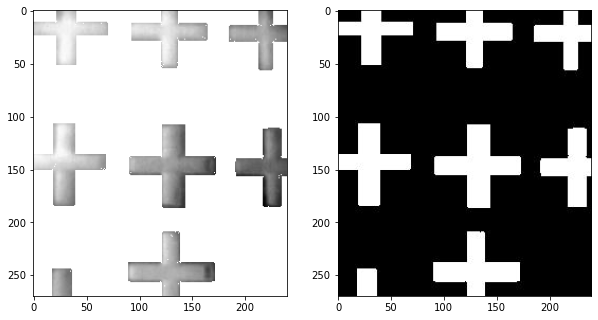

In [219]:
f, a = plt.subplots(1,2, figsize=(10,10))

image = cv2.imread("images/1.jpg")
mask = cv2.imread("images/mask_1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
a[0].imshow(mask)
print(len(mask))
for i in range(len(mask)):
    for j in range(len(mask[0])):
        if mask[i,j] < 240 :
            image[i,j] = 255
# plt.imsave("images/mask_1.jpg", mask, cmap = 'gray' )

# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# gray_mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

# gray[gray_mask > 10] = 255
a[0].imshow(image, cmap='gray')
# a[0].imshow(gray)
a[1].imshow(mask, cmap='gray')


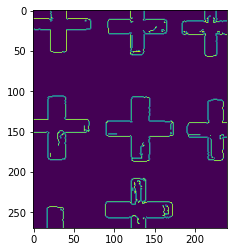

In [211]:
# f, a = plt.subplots(1,2)
# img = cv2.imread("images/2.jpg")
# img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# a[0].imshow(img_gray, cmap='gray')
edges = cv2.Canny(image=image, threshold1=40, threshold2=170) # Canny Edge Detection
plt.imshow(edges)